<a href="https://colab.research.google.com/github/Gumm11/Recommendation/blob/main/Jatim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn scikit-learn hdbscan

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import hdbscan
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import random

# Bersih-bersih Data

In [3]:
df = pd.read_csv('data/jatim.csv')
df.head()

,keyword,Title,Reviews,Review_points,Address,Country,City,State,Website,Phone,...,Open_Time_Friday,Open_Time_Saturday,Open_Time_Sunday,Popular_times_Monday,Popular_times_Tuesday,Popular_times_Wednesday,Popular_times_Thursday,Popular_times_Friday,Popular_times_Saturday,Popular_times_Sunday
0,Things to do in East Java,Tumpak Sewu Waterfall,6170,4.8,"Jalan Tumpak Sewu, Besukcukit, Sidomulyo, Kec....",ID,Lumajang Regency,East Java,NaN,+62 813-3406-1395,...,Friday 7 AM–3 PM 2024-11-29,Saturday 7 AM–3 PM 2024-11-23,Sunday 7 AM–3 PM 2024-11-24,0% busy at 6 AM;19% busy at 7 AM;28% busy at 8...,0% busy at 6 AM;15% busy at 7 AM;23% busy at 8...,0% busy at 6 AM;17% busy at 7 AM;26% busy at 8...,0% busy at 6 AM;17% busy at 7 AM;24% busy at 8...,0% busy at 6 AM;19% busy at 7 AM;26% busy at 8...,0% busy at 6 AM;25% busy at 7 AM;41% busy at 8...,0% busy at 6 AM;34% busy at 7 AM;53% busy at 8...
1,Things to do in East Java,Kapas Biru Waterfall,1069,4.7,"Mulyoarjo, Pronojiwo, Lumajang Regency, East J...",ID,Lumajang Regency,East Java,https://www.instagram.com/kapasbiruwaterfall_,NaN,...,Friday 7 AM–3:30 PM 2024-11-29,Saturday 7 AM–3:30 PM 2024-11-23,Sunday 7 AM–3:30 PM 2024-11-24,0% busy at 6 AM;17% busy at 7 AM;20% busy at 8...,0% busy at 6 AM;11% busy at 7 AM;14% busy at 8...,0% busy at 6 AM;14% busy at 7 AM;17% busy at 8...,0% busy at 6 AM;18% busy at 7 AM;28% busy at 8...,0% busy at 6 AM;14% busy at 7 AM;12% busy at 8...,0% busy at 6 AM;23% busy at 7 AM;35% busy at 8...,0% busy at 6 AM;28% busy at 7 AM;45% busy at 8...
2,Things to do in East Java,Bromo Tengger Semeru National Park,44464,4.8,"XXH2+7X4, Ranupani, East Java, Indonesia",ID,NaN,East Java,https://bromotenggersemeru.org/,+62 341 491828,...,Friday 7:30 AM–4:30 PM 2024-11-29,Saturday Closed 2024-11-23,Sunday Closed 2024-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Things to do in East Java,Arca Joko Dolog,971,4.6,"PPPV+24J, Taman Apsari St, Embong Kaliasin, Ge...",ID,Surabaya,East Java,NaN,NaN,...,Friday Open 24 hours 2024-11-29,Saturday Open 24 hours 2024-11-23,Sunday Open 24 hours 2024-11-24,4% busy at 4 AM;3% busy at 5 AM;6% busy at 6 A...,4% busy at 4 AM;5% busy at 5 AM;13% busy at 6 ...,6% busy at 4 AM;7% busy at 5 AM;9% busy at 6 A...,14% busy at 4 AM;20% busy at 5 AM;26% busy at ...,9% busy at 4 AM;14% busy at 5 AM;20% busy at 6...,5% busy at 4 AM;5% busy at 5 AM;4% busy at 6 A...,5% busy at 4 AM;7% busy at 5 AM;17% busy at 6 ...
4,Things to do in East Java,Coban Rondo Waterfall Pujon,11451,4.5,"Sebaluh, Jl. Coban Rondo, Pandesari, Kec. Pujo...",ID,Malang Regency,East Java,http://www.mypalawi.com/,+62 341 5025147,...,Friday 7:30 AM–5 PM 2024-11-29,Saturday 7:30 AM–5 PM 2024-11-23,Sunday 7:30 AM–5 PM 2024-11-24,0% busy at 6 AM;7% busy at 7 AM;17% busy at 8 ...,0% busy at 6 AM;4% busy at 7 AM;11% busy at 8 ...,0% busy at 6 AM;9% busy at 7 AM;20% busy at 8 ...,0% busy at 6 AM;2% busy at 7 AM;9% busy at 8 A...,0% busy at 6 AM;6% busy at 7 AM;15% busy at 8 ...,0% busy at 6 AM;19% busy at 7 AM;36% busy at 8...,0% busy at 6 AM;25% busy at 7 AM;47% busy at 8...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   keyword                  158 non-null    object 
 1   Title                    158 non-null    object 
 2   Reviews                  158 non-null    int64  
 3   Review_points            158 non-null    float64
 4   Address                  158 non-null    object 
 5   Country                  158 non-null    object 
 6   City                     155 non-null    object 
 7   State                    157 non-null    object 
 8   Website                  49 non-null     object 
 9   Phone                    73 non-null     object 
 10  Open_Time                158 non-null    object 
 11  Page_URL                 158 non-null    object 
 12  Google_id                158 non-null    object 
 13  Place_id                 158 non-null    object 
 14  Additional_info          1

In [5]:
df = df.dropna(subset=['Reviews', 'City', 'Latitude', 'Longitude'])
df = df[df['State'] == "East Java"]

df = df[['Title', 'Reviews', 'Review_points', 'Latitude', 'Longitude']]

df.head()

,Title,Reviews,Review_points,Latitude,Longitude
0,Tumpak Sewu Waterfall,6170,4.8,-8.230213,112.917544
1,Kapas Biru Waterfall,1069,4.7,-8.224920,112.936322
3,Arca Joko Dolog,971,4.6,-7.264916,112.742777
4,Coban Rondo Waterfall Pujon,11451,4.5,-7.884646,112.476824
5,Air Terjun Kabut Pelangi,240,4.6,-8.239286,112.933392


In [6]:
df.isnull().sum()

,0
Title,0
Reviews,0
Review_points,0
Latitude,0
Longitude,0


In [7]:
df.duplicated().sum()

0

In [8]:
df['Title'] = df['Title'].astype('category')
df.dtypes

,0
Title,category
Reviews,int64
Review_points,float64
Latitude,float64
Longitude,float64


# Train Model

In [9]:
coords = df[['Latitude', 'Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [10]:
coords_rad = np.radians(coords)

clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)
cluster_labels = clusterer.fit_predict(coords_rad)

df['Cluster'] = cluster_labels

In [11]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = (cluster_labels == -1).sum()

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Points per cluster
print(df['Cluster'].value_counts())

Number of clusters: 43
Number of noise points: 22
Cluster
-1     22
 30     7
 5      6
 41     5
 29     4
 24     4
 15     4
 36     4
 19     4
 8      3
 12     3
 16     3
 2      3
 38     3
 27     3
 21     3
 18     3
 4      3
 31     3
 3      3
 28     3
 40     3
 9      2
 6      2
 26     2
 14     2
 10     2
 32     2
 17     2
 13     2
 39     2
 37     2
 1      2
 42     2
 34     2
 7      2
 23     2
 20     2
 25     2
 33     2
 22     2
 0      2
 35     2
 11     2
Name: count, dtype: int64


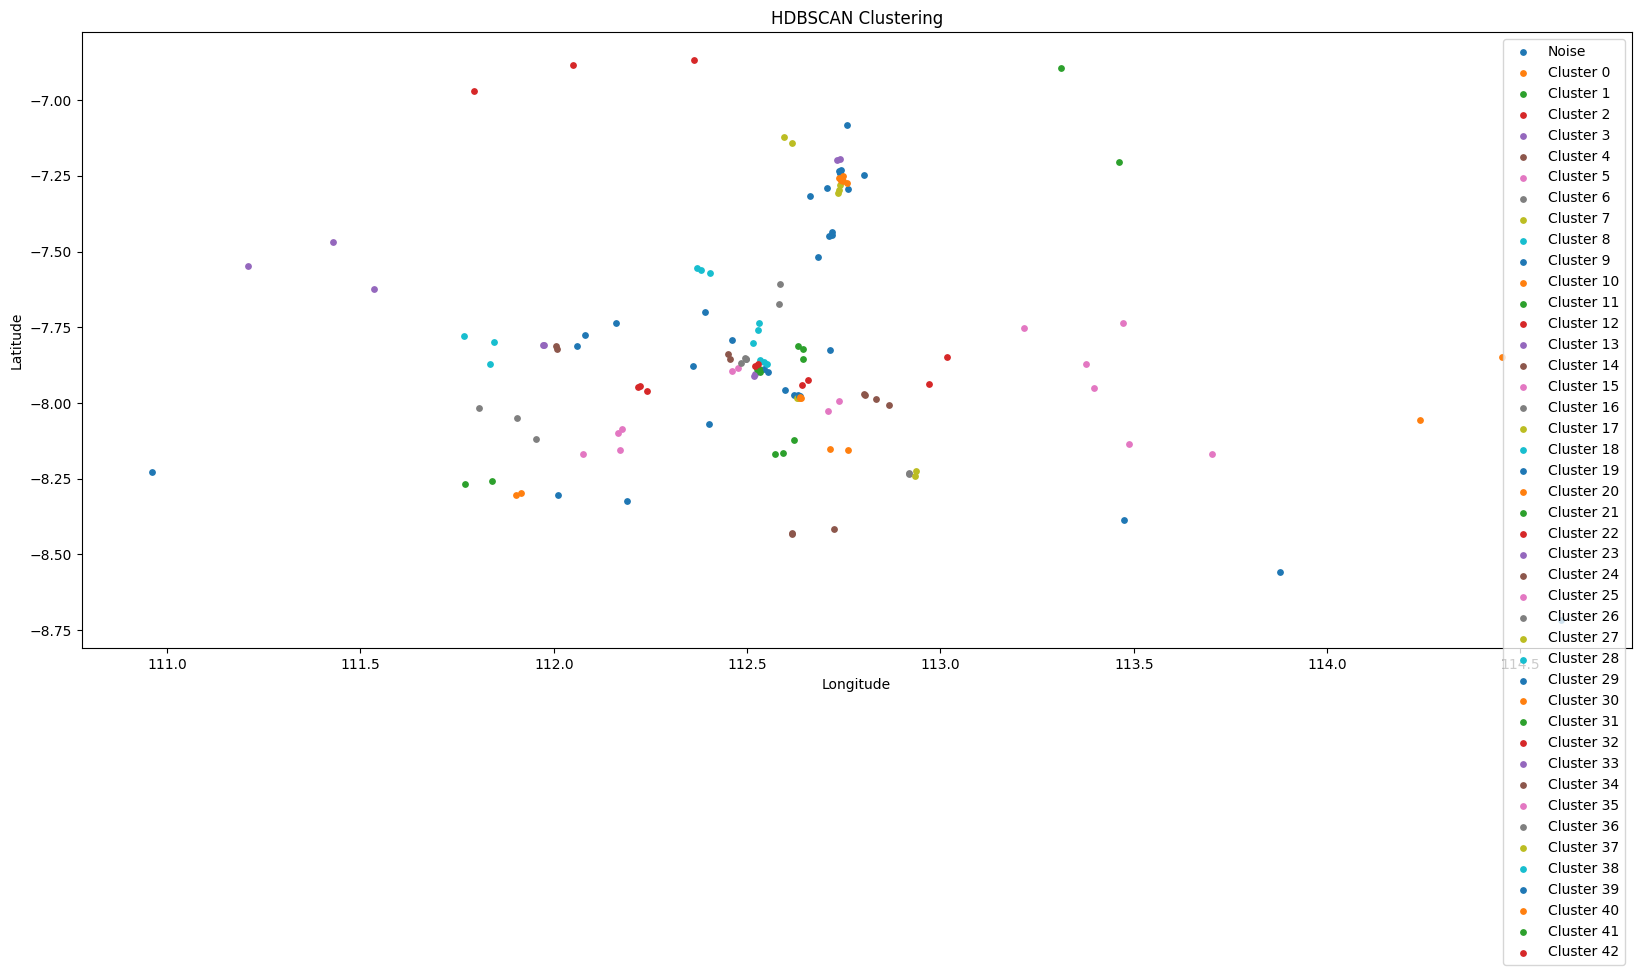

In [12]:
plt.figure(figsize=(20, 8))
for cluster_id in sorted(df['Cluster'].unique()):
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise"
    cluster_points = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_points['Longitude'], cluster_points['Latitude'], label=label, s=15)

plt.title("HDBSCAN Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [13]:
clusters = {}
for cluster_id in sorted(df['Cluster'].unique()):
    if cluster_id == -1:
        continue
    clusters[f"Cluster {cluster_id + 1}"] = df[df['Cluster'] == cluster_id][['Title', 'Latitude', 'Longitude']]

for day, locations in clusters.items():
    print(f"\n{day} ({len(locations)} locations):")
    print(locations)


Cluster 1 (2 locations):
                Title  Latitude   Longitude
7   Wisata Kawah Ijen -8.057056  114.239992
22    Africa van Java -7.848568  114.451672

Cluster 2 (2 locations):
                Title  Latitude   Longitude
57  Air Terjun Toroan -6.892890  113.312323
69   Wisata Api Abadi -7.204963  113.461019

Cluster 3 (3 locations):
                     Title  Latitude   Longitude
34       Nglirip Waterfall -6.968349  111.793986
47     Maharani Zoo & Cave -6.868458  112.361992
74  Klenteng Kwan Sing Bio -6.885517  112.050753

Cluster 4 (3 locations):
                                     Title  Latitude   Longitude
78                    Air Terjun Pengantin -7.545996  111.209487
135  SunCity Water & ThemePark Kota Madiun -7.622392  111.534992
147    Taman Wisata Tirtonirmolo Waterpark -7.466702  111.429359

Cluster 5 (3 locations):
                    Title  Latitude   Longitude
51   Pantai Batu Bengkung -8.430188  112.615188
54      Pantai Watu Lepek -8.432465  112.616701
124   

In [14]:
joblib.dump(clusterer, 'jatim.pkl')
print("Model saved successfully!")

Model saved successfully!


# Test Hasil Cluster

In [15]:
model = joblib.load('jatim.pkl')

## User Input

### Sesuai data di dalam model

In [16]:
file_path = 'data/jatim.csv'
df = pd.read_csv(file_path)

# Randomly select 15 places from the dataset
user_input_places = df.sample(15)[['Title', 'Latitude', 'Longitude']]

user_input = {
    'places': user_input_places[['Title', 'Latitude', 'Longitude']].values.tolist(),
    # 'total_days': 2,
    # 'departure_time': '08:00',
    # 'return_time': '18:00'
}

# # Filter rows where City or Region indicates Malang Regency
# malang_regency_places = df[df['City'].str.contains("Malang", na=False, case=False)]

# # Randomly select 20 places concentrated in Malang Regency
# user_input_places_malang = malang_regency_places.sample(20)[['Title', 'Latitude', 'Longitude']]

# # Create the user input structure
# user_input = {
#     'places': user_input_places_malang[['Title', 'Latitude', 'Longitude']].values.tolist(),
#     # 'total_days': 2,
#     # 'departure_time': '08:00',
#     # 'return_time': '18:00'
# }

user_input

{'places': [['Pantai Kedung Tumpang', -8.3033462, 112.0102501],
  ['Kapas Biru Waterfall', -8.2249196, 112.9363216],
  ['Eco Green Park', -7.8877752, 112.5266102],
  ['Coban Rais', -7.9116767, 112.5184342],
  ['Kelenteng Tjoe Hwie Kiong', -7.8200084, 112.009593],
  ['Jaddih Hill Madura', -7.082283, 112.7595396],
  ['Coban Jodo', -7.9856864, 112.8322674],
  ['Bromo Tengger Semeru National Park', -8.0218747, 112.9524384],
  ['Coban Bidadari', -8.006144, 112.867754],
  ['KidZania Surabaya', -7.2895103, 112.7065639],
  ['Bendungan Wonorejo', -8.0178527, 111.8066484],
  ['Alas Kandung Waterfall', -8.1694969, 112.0759203],
  ['Sweet Memories Selfie', -7.8879028, 112.5290513],
  ['Badut Temple', -7.9577761, 112.5986081],
  ['Kawah Ijen', -8.0584134, 114.2412788]],
 'total_days': 2,
 'departure_time': '08:00',
 'return_time': '18:00'}

### User Berkreasi (Data di luar model)

In [17]:
user_input = {
    'places': [
        ['Sumber Sira Putukrejo', -8.1229106, 112.620597],
        ['Coban Jodo', -7.9856864, 112.8322674],
        ['Coban Rondo Waterfall Pujon', -7.8846458, 112.4768237],
        ['Sendiki Beach', -8.4168131, 112.7259382],
        ['Coban Supit Urang', -7.7910044, 112.4603522],
        ['Kampung Biru Arema', -7.9813051, 112.6376925],
        ['Coban Tarzan ꦕꦺꦴꦧꦤ꧀ꦠꦂꦱꦤ꧀ or Coban Toris', -7.9741625, 112.8041719],
        ['Trunojoyo Park', -7.9764328, 112.6365191],
        ['Sumber Pitu', -7.8955192, 112.4621553],
        ['Boonpring', -8.1557705, 112.7619607],
        ['Random Malang Place 1', -8.044794, 112.638120],
        ['Random Malang Place 2', -8.086359, 112.616672],
        ['Random Malang Place 3', -7.860085, 112.645027],
        ['Random Malang Place 4', -7.868678, 112.616050],
        ['Random Malang Place 5', -8.012723, 112.634101],
        ['Random Malang Place 6', -8.156440, 112.652110],
        ['Random Malang Place 7', -8.009303, 112.626328],
        ['Random Malang Place 8', -8.116363, 112.647088],
    ]
}

user_input

{'places': [['Sumber Sira Putukrejo', -8.1229106, 112.620597],
  ['Coban Jodo', -7.9856864, 112.8322674],
  ['Coban Rondo Waterfall Pujon', -7.8846458, 112.4768237],
  ['Sendiki Beach', -8.4168131, 112.7259382],
  ['Coban Supit Urang', -7.7910044, 112.4603522],
  ['Kampung Biru Arema', -7.9813051, 112.6376925],
  ['Coban Tarzan ꦕꦺꦴꦧꦤ꧀ꦠꦂꦱꦤ꧀ or Coban Toris', -7.9741625, 112.8041719],
  ['Trunojoyo Park', -7.9764328, 112.6365191],
  ['Sumber Pitu', -7.8955192, 112.4621553],
  ['Boonpring', -8.1557705, 112.7619607],
  ['Random Malang Place 1', -8.044794, 112.63812],
  ['Random Malang Place 2', -8.086359, 112.616672],
  ['Random Malang Place 3', -7.860085, 112.645027],
  ['Random Malang Place 4', -7.868678, 112.61605],
  ['Random Malang Place 5', -8.012723, 112.634101],
  ['Random Malang Place 6', -8.15644, 112.65211],
  ['Random Malang Place 7', -8.009303, 112.626328],
  ['Random Malang Place 8', -8.116363, 112.647088]]}

### Predict

In [18]:
# Extract only the coordinates (Latitude, Longitude) for clustering
user_coords = [(place[1], place[2]) for place in user_input['places']]  # Extract numerical coordinates

# Convert coordinates to radians
user_coords_rad = np.radians(user_coords)

# Predict clusters using HDBSCAN
cluster_labels = clusterer.fit_predict(user_coords_rad)

# Prepare DataFrame with Titles and Clusters
user_df = pd.DataFrame(user_input['places'], columns=['Title', 'Latitude', 'Longitude'])
user_df['Cluster'] = cluster_labels

print("\nUser Places with Clusters:")
print(user_df)


User Places with Clusters:
                                      Title  Latitude   Longitude  Cluster
0                     Sumber Sira Putukrejo -8.122911  112.620597        3
1                                Coban Jodo -7.985686  112.832267        0
2               Coban Rondo Waterfall Pujon -7.884646  112.476824        1
3                             Sendiki Beach -8.416813  112.725938       -1
4                         Coban Supit Urang -7.791004  112.460352        1
5                        Kampung Biru Arema -7.981305  112.637692        4
6   Coban Tarzan ꦕꦺꦴꦧꦤ꧀ꦠꦂꦱꦤ꧀ or Coban Toris -7.974163  112.804172        0
7                            Trunojoyo Park -7.976433  112.636519        4
8                               Sumber Pitu -7.895519  112.462155        1
9                                 Boonpring -8.155770  112.761961       -1
10                    Random Malang Place 1 -8.044794  112.638120       -1
11                    Random Malang Place 2 -8.086359  112.616672       

## Hasil per Hari

### Display manusiawi

In [19]:
# Group locations by cluster
grouped_clusters = user_df.groupby('Cluster')

# Recommend days based on cluster groups
itinerary = {}
day = 1
for cluster_id, group in grouped_clusters:
    if cluster_id == -1:
        # Assign distant points to separate days
        for _, row in group.iterrows():
            itinerary[f"{day}"] = [row['Title']]
            day += 1
    else:
        # Include place names for valid clusters
        itinerary[f"{day}"] = group['Title'].tolist()
        day += 1

# Display itinerary
for day, locations in itinerary.items():
    print(f"\nSchedule: Day {day}")
    for location in locations:
        print(f"- {location}")

print("\nRecommended Total Days:", day)


Schedule: Day 1
- Sendiki Beach

Schedule: Day 2
- Boonpring

Schedule: Day 3
- Random Malang Place 1

Schedule: Day 4
- Coban Jodo
- Coban Tarzan ꦕꦺꦴꦧꦤ꧀ꦠꦂꦱꦤ꧀ or Coban Toris

Schedule: Day 5
- Coban Rondo Waterfall Pujon
- Coban Supit Urang
- Sumber Pitu

Schedule: Day 6
- Random Malang Place 3
- Random Malang Place 4

Schedule: Day 7
- Sumber Sira Putukrejo
- Random Malang Place 2
- Random Malang Place 6
- Random Malang Place 8

Schedule: Day 8
- Kampung Biru Arema
- Trunojoyo Park

Schedule: Day 9
- Random Malang Place 5
- Random Malang Place 7

Recommended Total Days: 9


### Display tidak manusiawi

In [20]:
# Group locations by cluster
grouped_clusters = user_df.groupby('Cluster')

# Recommend days based on cluster groups
itinerary = {}
day = 1
for cluster_id, group in grouped_clusters:
    if cluster_id == -1:
        # Assign distant points to separate days
        for _, row in group.iterrows():
            itinerary[f"Day {day}"] = [row]
            day += 1
    else:
        itinerary[f"Day {day}"] = group
        day += 1

# Display the itinerary
for day, locations in itinerary.items():
    print(f"\n{day} Schedule:")
    print(locations)


Day 1 Schedule:
[Title        Sendiki Beach
Latitude         -8.416813
Longitude       112.725938
Cluster                 -1
Name: 3, dtype: object]

Day 2 Schedule:
[Title         Boonpring
Latitude       -8.15577
Longitude    112.761961
Cluster              -1
Name: 9, dtype: object]

Day 3 Schedule:
[Title        Random Malang Place 1
Latitude                 -8.044794
Longitude                112.63812
Cluster                         -1
Name: 10, dtype: object]

Day 4 Schedule:
                                     Title  Latitude   Longitude  Cluster
1                               Coban Jodo -7.985686  112.832267        0
6  Coban Tarzan ꦕꦺꦴꦧꦤ꧀ꦠꦂꦱꦤ꧀ or Coban Toris -7.974163  112.804172        0

Day 5 Schedule:
                         Title  Latitude   Longitude  Cluster
2  Coban Rondo Waterfall Pujon -7.884646  112.476824        1
4            Coban Supit Urang -7.791004  112.460352        1
8                  Sumber Pitu -7.895519  112.462155        1

Day 6 Schedule:
        